<a href="https://colab.research.google.com/github/joan9807/ratMix/blob/main/%EC%A5%91%EC%A5%91%EC%9D%B4_%EB%AF%B9%EC%8A%A4_ver2_3_%EC%9A%94%EC%95%BD%EB%B3%B8_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/maruburi/MaruBuri-Regular.ttf"
title_font_path = "/usr/share/fonts/truetype/maruburi/MaruBuri-Bold.ttf"

font_prop = fm.FontProperties(fname=font_path)
title_font_prop = fm.FontProperties(fname=title_font_path)

In [10]:
# 데이터
labels_wrapped = [
    "셀렉티브 래트", "할란2018s", "닥터 시리얼", "파스타", "채소믹스",
    "강아지 사료1", "수수", "통보리", "기타"
]
sizes = [21, 20, 10, 6, 6, 6, 5, 5, 21]

others_table = pd.DataFrame([
    ["강아지 사료2", 4.0, 20.0],
    ["피율무", 4.0, 20.0],
    ["허브믹스", 4.0, 20.0],
    ["동결건조 연어", 2.0, 10.0],
    ["볶은 병아리콩", 2.0, 10.0],
    ["쌀과자", 1.0, 5.0],
    ["영양효모", 1.0, 5.0],
    ["볶은아마씨", 0.8, 4.0],
    ["치아씨드", 0.8, 4.0],
    ["비타민c 보충제", 0.6, 3.0],
    ["말린 파슬리", 0.4, 2.0],
    ["계란껍질 분말", 0.4, 2.0],
], columns=["재료", "비율(%)", "중량(g)"])

nutrient_lines = [
    "· 조단백질: 16.8%",
    "· 조지방: 5.2%",
    "· 조섬유: 5.4%",
    "",
    "· 칼슘: 0.63%",
    "· 인: 0.61%",
    "· 철분: 66.7 mg/kg",
    "· 아연: 35 mg/kg",
    "· 비타민 A: 9,795 IU/kg",
    "· 비타민 C: 29 mg/kg",
    "· 비타민 D: 799 IU/kg",
    "· 비타민 E: 58 mg/kg",
    "· 오메가3: ~3.5 g/kg",
    "· B군 비타민 보강 완료"
]



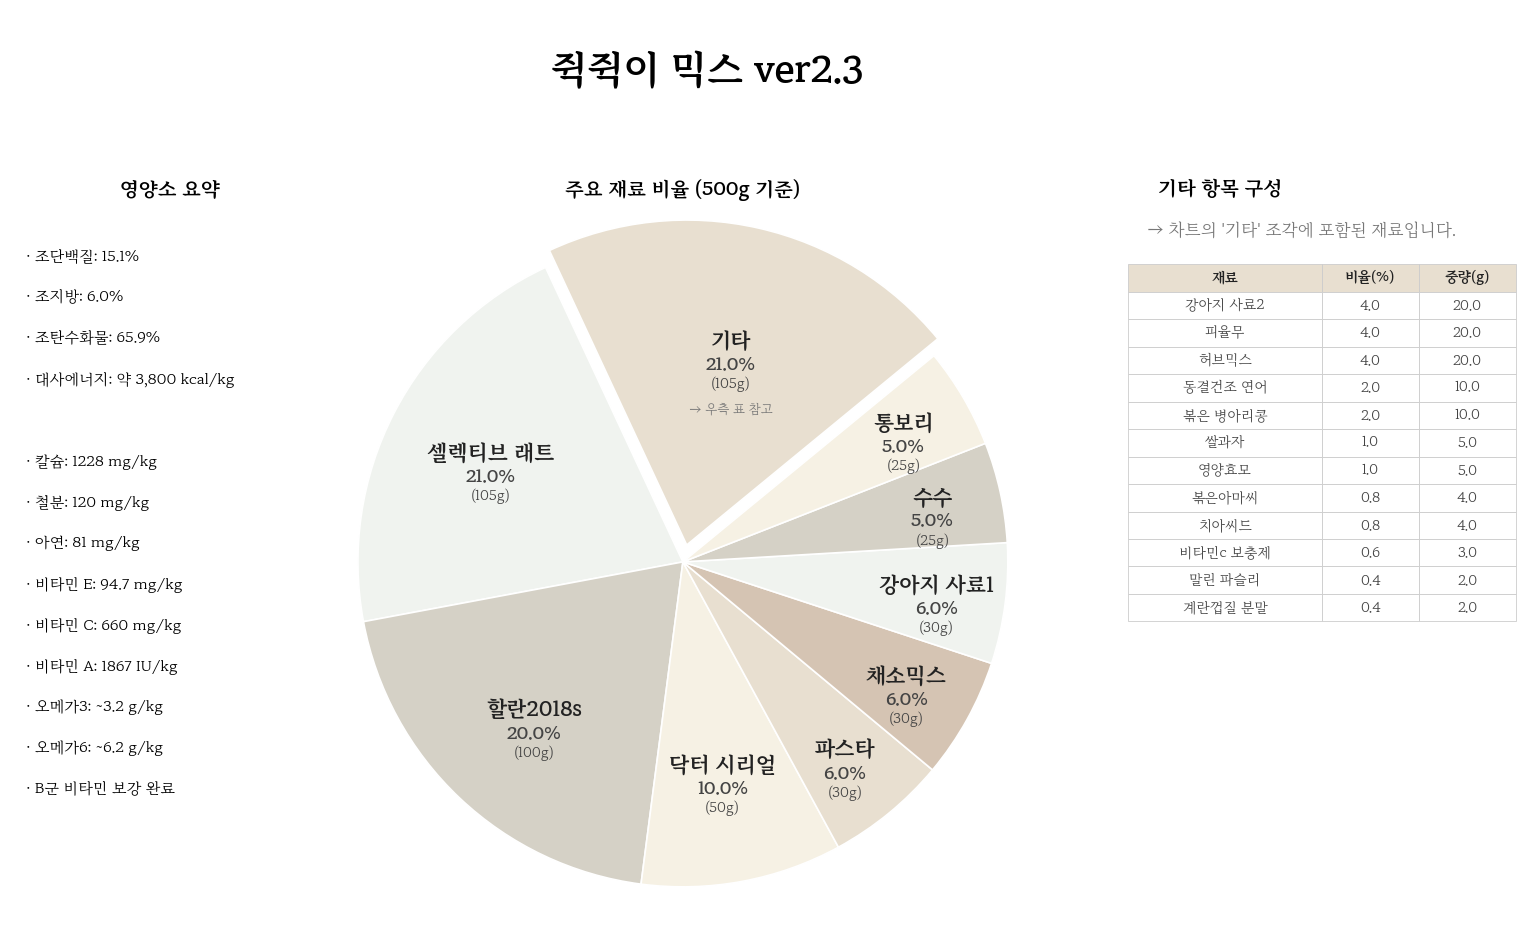

In [11]:
# 색상 설정 (베이지톤)
color_palette_extended = ['#f0f3ef', '#d5d1c6', '#f6f1e4', '#e8dfd0', '#d5c4b3',
                          '#f0f3ef', '#d5d1c6', '#f6f1e4', '#e8dfd0']

# 시각화
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[0.2,0.1,1.0], width_ratios=[1.3, 2.2, 1.5])
title_ax = plt.subplot(gs[0, :])


ax0 = plt.subplot(gs[1:, 0])  # 영양소 영역
ax1 = plt.subplot(gs[1:, 1])  # 차트
ax2 = plt.subplot(gs[1:, 2])  # 기타표

# 제목
title_ax.axis('off')
title_ax.text(0.5, 0.5, "쥑쥑이 믹스 ver2.3", fontsize=27, fontproperties=title_font_prop, weight='bold', ha='center', va='center')

# 영양소 요약
ax0.clear()
ax0.axis('off')
ax0.text(0.5, 1, "영양소 요약", fontsize=14, fontproperties=title_font_prop,ha='center',va='center')
for i, line in enumerate(nutrient_lines):
    ax0.text(0.05, 0.92 - i * 0.055, line, fontsize=11, fontproperties=font_prop, ha='left', va='top')

# 차트

from math import cos, sin, radians

# "기타" 항목만 살짝 분리
explode = [0.08 if label == "기타" else 0 for label in labels_wrapped]

wedges, texts = ax1.pie(
    sizes,
    labels=None,
    radius=1.5,
    #autopct=lambda pct: f"{pct:.1f}\n{pct * 528 / 100:.0f}g",
    startangle=115,
    colors=color_palette_extended,
    wedgeprops=dict(edgecolor='white', linewidth=1.2),
    explode=explode
)

total = sum(sizes)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = radians(angle)

     # 👉 퍼센트 계산
    percent = sizes[i] / total * 100
    grams = sizes[i] * 500 / 100  # 500g 기준
    label = labels_wrapped[i]

    # ✅ 8% 이하만 바깥쪽으로
    r = 1.18 if percent <= 8 else 1.0

    x = r * cos(angle_rad)
    y = r * sin(angle_rad)

    # 각각의 텍스트
    label = labels_wrapped[i]
    percent = sizes[i] / total * 100
    grams = sizes[i] * 500 / 100  # 500g 기준


    # 재료이름 라벨
    ax1.text(x, y + 0.04, label,
             fontsize=15, fontproperties=title_font_prop,
             color='#222222', ha='center', va='center')

    # 기타 항목에만 부제
    if label == "기타":
        ax1.text(x, y - 0.24, "→ 우측 표 참고",
                 fontsize=9, fontproperties=font_prop,
                 color='#777777', ha='center', va='top')


    # 비율
    ax1.text(x, y-0.07, f"{percent:.1f}%",
             fontsize=13, fontproperties=title_font_prop,
             color='#444444',
             ha='center', va='center')
    #그람수
    ax1.text(x, y-0.12, f"({grams:.0f}g)",
             fontsize=10, fontproperties=font_prop,
             color='#444444',
             ha='center', va='top')

ax1_title = plt.subplot(gs[1, 1])
ax1_title.axis('off')
ax1_title.text(0.5, 1, "주요 재료 비율 (500g 기준)", fontsize=14, fontproperties=title_font_prop, ha='center', va='center')






########################
# 기타 항목 표
ax2.axis('off')
ax2.text(0.5, 1, "기타 항목 구성", ha='center', va='center', fontsize=14, fontproperties=title_font_prop)
ax2.text(0.3, 0.94, "→ 차트의 '기타' 조각에 포함된 재료입니다.", ha='left', fontsize=12, fontproperties=font_prop, color='#777')

table_data = [["재료", "비율(%)", "중량(g)"]] + others_table[["재료", "비율(%)", "중량(g)"]].values.tolist()
col_width_ratio = [0.4, 0.2, 0.2]

table = ax2.table(cellText=table_data, loc='center', colLabels=None, cellLoc='center',
                  bbox=[0.25, 0.42, 1.05, 0.48], colWidths=col_width_ratio)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.1, 1.2)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0.6)
    cell.set_edgecolor("#ccc")
    cell.get_text().set_color('#444')
    cell.get_text().set_fontproperties(font_prop)
    if key[0] == 0:
        cell.set_fontsize(15)  # 제목용 글씨 크기
        cell.get_text().set_color('#222222')
        cell.get_text().set_fontproperties(title_font_prop)  # 굵은 폰트
        cell.set_facecolor("#e8dfd0")  # 아이보리 배경


plt.savefig("쥑쥑이_믹스_ver2.3.svg", dpi=300, bbox_inches='tight')


In [ ]:


plt.savefig("쥑쥑이_믹스_ver2.0.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>